Task 1: Download the dataset

Task 2: Load the dataset into the tool

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv('/content/penguins_size.csv')
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [3]:
df.shape

(344, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


---
Task 3: Perform Below Visualizations

● Univariate Analysis

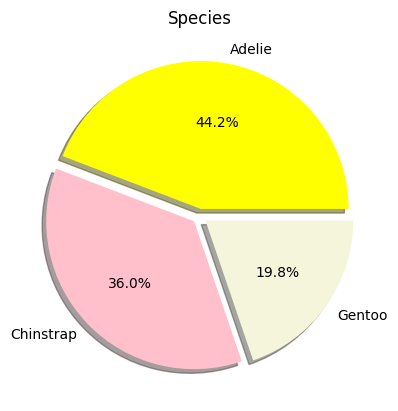

In [23]:
plt.pie(df['species'].value_counts(),[0.05,0.05,0.05],labels=df['species'].unique(),autopct='%1.1f%%',colors=['yellow','pink','beige'],shadow=True)
plt.title('Species')
plt.show()

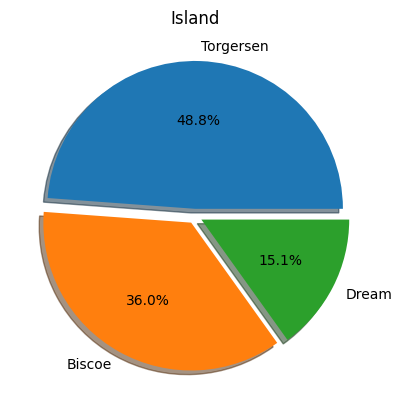

In [24]:
plt.pie(df['island'].value_counts(),[0.05,0.05,0.05],labels=df['island'].unique(),autopct='%1.1f%%',shadow=True)
plt.title('Island')
plt.show()

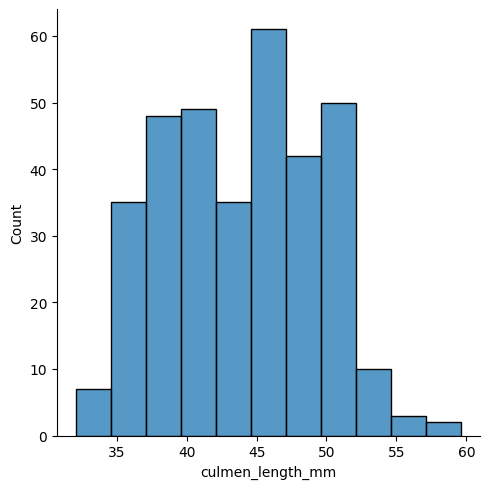

In [18]:
sns.displot(df['culmen_length_mm'])

<ipython-input-25-04c41cfbcb54>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['body_mass_g'])


<Axes: xlabel='body_mass_g', ylabel='Density'>

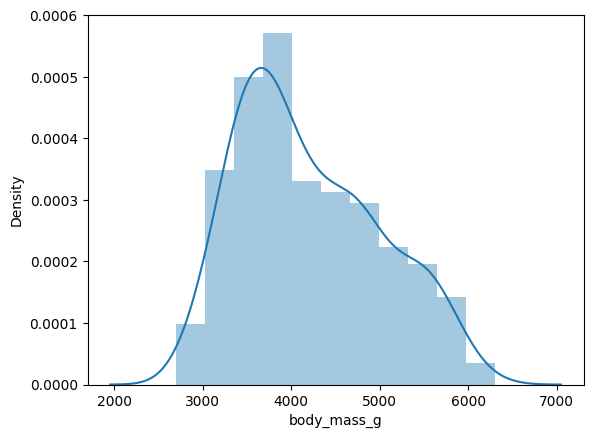

In [25]:
sns.distplot(df['body_mass_g'])

● Bi- Variate Analysis

<Axes: xlabel='body_mass_g', ylabel='culmen_depth_mm'>

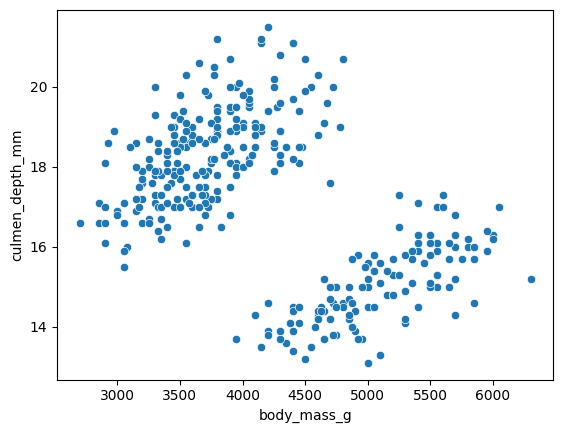

In [27]:
sns.scatterplot(x=df['body_mass_g'],y=df['culmen_depth_mm'])

<Axes: xlabel='culmen_length_mm', ylabel='flipper_length_mm'>

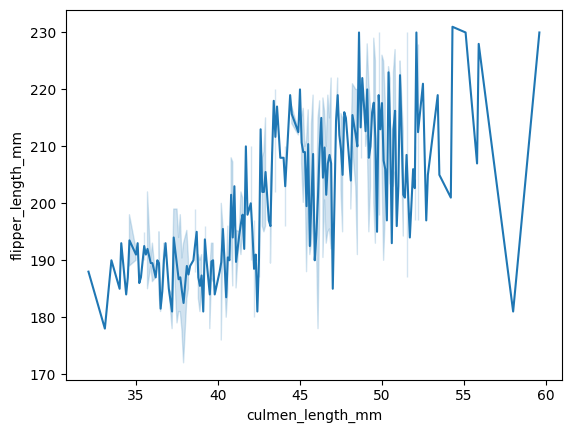

In [28]:
sns.lineplot(x=df['culmen_length_mm'],y=df['flipper_length_mm'])

● Multi-Variate Analysis


<ipython-input-29-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

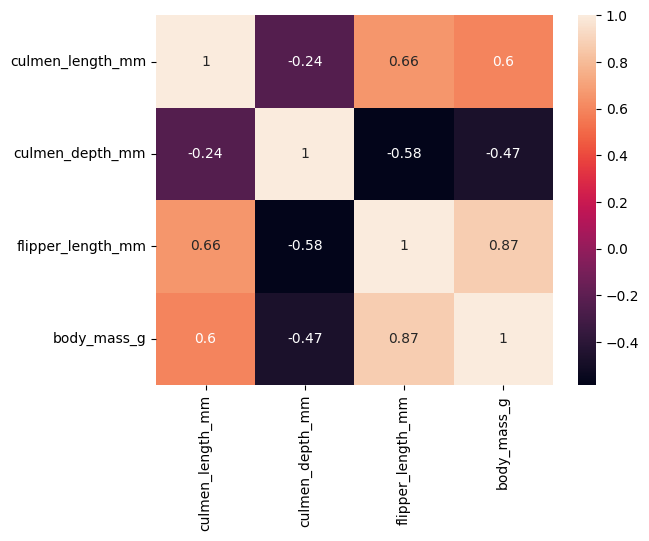

In [29]:
sns.heatmap(df.corr(),annot=True)

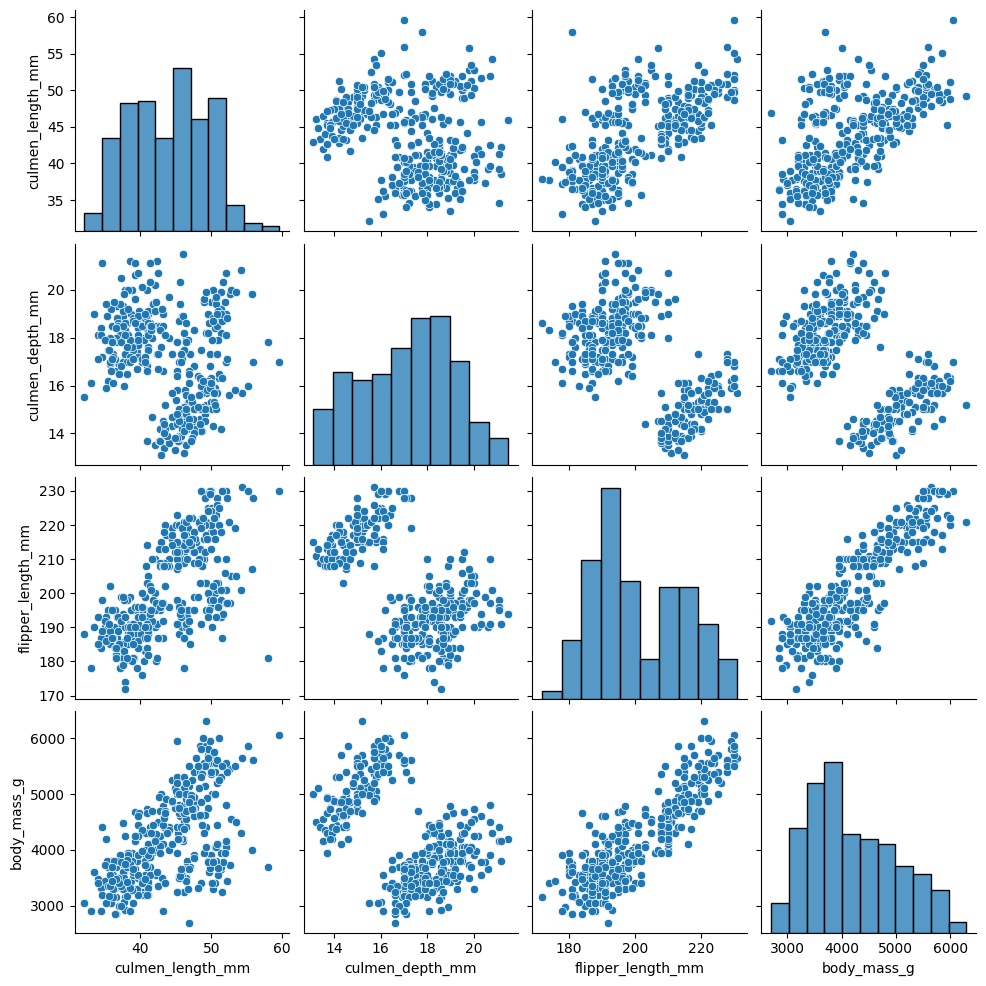

In [30]:
sns.pairplot(df)

---
Task 4:Perform descriptive statistics on the dataset

In [31]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


---
Task 5: Check for Missing values and deal with them

In [32]:
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [33]:
df['culmen_depth_mm'].fillna(df['culmen_depth_mm'].median(),inplace=True)

In [34]:
df['culmen_length_mm'].fillna(df['culmen_length_mm'].median(),inplace=True)

In [35]:
df['flipper_length_mm'].fillna(df['flipper_length_mm'].median(),inplace=True)

In [36]:
df['body_mass_g'].fillna(df['body_mass_g'].median(),inplace=True)

In [41]:
df['sex'].value_counts()

MALE      168
FEMALE    165
.           1
Name: sex, dtype: int64

In [42]:
df['sex'].fillna('MALE',inplace=True)

In [43]:
df['sex'].replace('.','MALE',inplace=True)

In [44]:
df.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

---
Task 6:Find the outliers and replace them outliers

<Axes: >

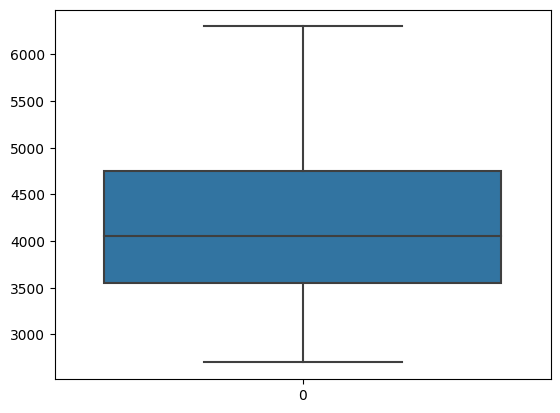

In [46]:
sns.boxplot(df['body_mass_g'])

<Axes: >

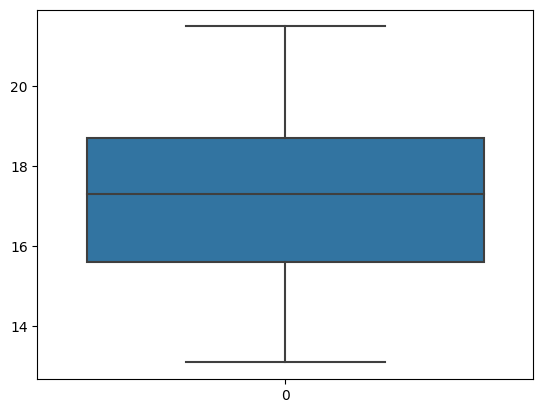

In [47]:
sns.boxplot(df['culmen_depth_mm'])

<Axes: >

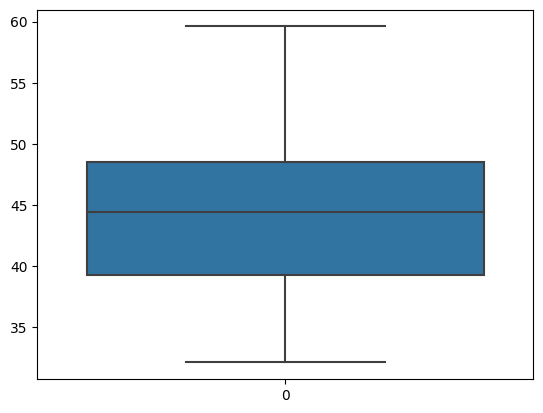

In [48]:
sns.boxplot(df['culmen_length_mm'])

<Axes: >

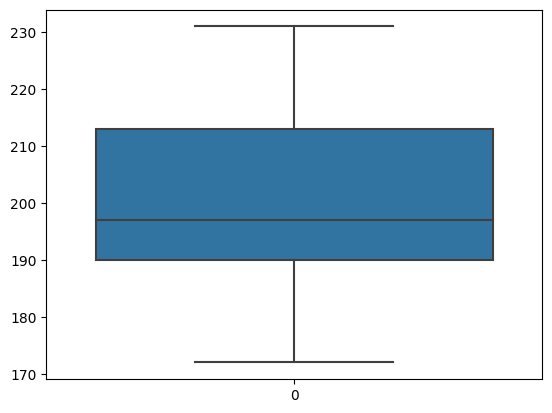

In [49]:
sns.boxplot(df['flipper_length_mm'])

---
Task 7: Check the correlation of independent variables with the target

In [52]:
df.corr()['body_mass_g'].sort_values(ascending=False)

<ipython-input-52-8ab72ef00326>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['body_mass_g'].sort_values(ascending=False)


body_mass_g          1.000000
flipper_length_mm    0.871221
culmen_length_mm     0.594925
culmen_depth_mm     -0.471942
Name: body_mass_g, dtype: float64

---
Task 8: Check for Categorical columns and perform encoding

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   344 non-null    float64
 3   culmen_depth_mm    344 non-null    float64
 4   flipper_length_mm  344 non-null    float64
 5   body_mass_g        344 non-null    float64
 6   sex                344 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [54]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [55]:
df['species'] = le.fit_transform(df['species'])

In [56]:
df['island'] = le.fit_transform(df['island'])

In [57]:
df['sex'] = le.fit_transform(df['sex'])

In [58]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,39.10,18.7,181.0,3750.0,1
1,0,2,39.50,17.4,186.0,3800.0,0
2,0,2,40.30,18.0,195.0,3250.0,0
3,0,2,44.45,17.3,197.0,4050.0,1
4,0,2,36.70,19.3,193.0,3450.0,0


---
Task 9: Split the data into dependent and independent variables

In [59]:
x=df.drop(columns=['species'],axis=1) #Features

In [60]:
y=df['species'] #Target

---
Task 10: Scaling the data

In [61]:
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()

In [62]:
x_scaled = pd.DataFrame(scale.fit_transform(x),columns=x.columns)
x_scaled.head()

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,1.0,0.254545,0.666667,0.152542,0.291667,1.0
1,1.0,0.269091,0.511905,0.237288,0.305556,0.0
2,1.0,0.298182,0.583333,0.389831,0.152778,0.0
3,1.0,0.449091,0.500000,0.423729,0.375000,1.0
4,1.0,0.167273,0.738095,0.355932,0.208333,0.0


---
Task 11: Split the data into training and testing

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.3,random_state=0)

---
Task 12: Check the training and testing data shape

In [65]:
x_train.shape

(240, 6)

In [66]:
x_test.shape

(104, 6)

In [67]:
y_train.shape

(240,)

In [68]:
y_test.shape

(104,)